# Polynomial Regression and Cross Validation

For this assignment we will try to fit a polynomial function to a provided dataset. Fitting a function is a quintessential example of *supervised learning*, specifically *regression*. There are several concepts in this notebook that are applicable to lots of *supervised learning* algorithms.

In earlier exercises we have used the notion of a **cost function**, which describes how well a given model fits the provided data. This function can be minimized in several different ways, depending on complexity of the model and associated cost function. Examples of methods you might use are using *gradient descent* to iteratively approach the minimum or computing the minimum directly using an analytic method, both of which you have seen some version of before.

We will start with the most basic polynomial model (linear) and compute the parameters that minimize the cost function directly, based on the derivative. It is important that you try and comprehend what you are doing in this most basic version, as it will help you understand the more complex models that use the same principles later on. 

The other common concept introduced is model selection using **cross validation**. In this assignment it will be used to determine the model that has the best matching polynomial degree with respect to the function we are fitting. Both cross validation for model selection and minizing the cost function to achieve the best possible fit, are used in many other supervised models like *neural networks*.

Below are some imports to get your started. You do not need to add code for this cell to work, just make sure you run the cell to import the libraries in your notebook.

In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Loading the data [1 pt]

Write a function to read the data stored in the file *points.csv* and convert it to a *Numpy* array. Each line in the file is a data point consisting of an **x**-value and **y**-value, separated by a comma. You could use Numpy's [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), or any other method of your choice to read csv-files and convert that to the correct type.

Test your function and print the resulting array to make sure you know what the data looks like.

In [35]:
### YOUR SOLUTION HERE
def load_file(filename):
    return np.loadtxt(filename, delimiter=',', dtype=float)

data = load_file('points.csv')
print(data)

[[-5.00000000e+00  4.20260155e+01]
 [-4.65517241e+00  5.93194247e+01]
 [-4.31034483e+00 -5.88431515e+01]
 [-3.96551724e+00 -6.69165975e+01]
 [-3.62068966e+00 -1.15078069e+02]
 [-3.27586207e+00 -7.97426725e+01]
 [-2.93103448e+00 -5.51717987e+01]
 [-2.58620690e+00 -3.51889839e+01]
 [-2.24137931e+00 -2.70522179e+01]
 [-1.89655172e+00 -6.09114952e-01]
 [-1.55172414e+00 -3.15679234e+01]
 [-1.20689655e+00 -3.84826305e+01]
 [-8.62068966e-01 -1.58177415e+01]
 [-5.17241379e-01 -1.80653645e+01]
 [-1.72413793e-01  3.06491073e+01]
 [ 1.72413793e-01  4.51857925e+01]
 [ 5.17241379e-01 -3.38493633e+01]
 [ 8.62068966e-01 -6.53415429e+00]
 [ 1.20689655e+00 -1.80395279e+00]
 [ 1.55172414e+00  2.00521571e+01]
 [ 1.89655172e+00  1.04010654e+01]
 [ 2.24137931e+00  2.63662035e+01]
 [ 2.58620690e+00  5.19151860e+01]
 [ 2.93103448e+00  9.85175983e+01]
 [ 3.27586207e+00  2.00295883e+02]
 [ 3.62068966e+00  2.54697656e+02]
 [ 3.96551724e+00  3.26024319e+02]
 [ 4.31034483e+00  4.98548820e+02]
 [ 4.65517241e+00  6

In [36]:
# assert shape ofzo

## Plotting the points [2 pt]

Write a function `split_X_r` to separate your `data` into an `X` (input) matrix and a `Y` (output) matrix using [slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

Using both vectors, create a graph containing the plotted points you just read from the file. A plot of data should be visible below your code. As you can se in the cell below, [we can check the shapes](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) of X and Y, they should both be (30,1) as we are creating input and output *matrices*.

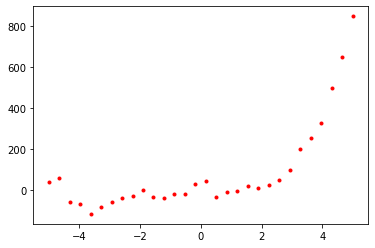

In [37]:
### YOUR SOLUTION HERE
def split_X_Y(data):
    return (data[:, 0, None], data[:, 1, None])
    
X, Y = split_X_Y(data)

plt.plot(X, Y, 'r.')
plt.show()

In [38]:
assert X.shape == (30, 1)
assert Y.shape == (30, 1)

## Defining the linear model [1 pt]

Now we are going to try to find the polynomial function which best relates these points. We will start by fitting a simple linear function of the form:

$$g(x) = w_1x + w_0$$

Write a function that computes the predicted output value $g(x)$ given a value of $x$ and the parameters $w_0$ and $w_1$. 

Check the output of the function by entering some values for `w0` and `w1`, then plot points for values `x in range(10)`.

In [39]:
### YOUR SOLUTION HERE
def linear_model(w0, w1, x):
    return w1 * x + w0

In [46]:
### YOUR CHECKS HERE

## Creating the cost function [2 pt]

Our cost function is defined as the sum of the squared errors of each prediction:

$$E(w_1, w_0|X) = \frac{1}{2N}\sum^N_{t=1} (y^t - g(x^t))^2$$

Write a function to compute the cost based on the dataset $X$, $Y$ and parameters $w_0$ and $w_1$. Based on your plot of the data, try to estimate some sensible values for $w_0$ and $w_1$ and compute the corresponding cost. Try at least 3 different values and print their cost. Order the prints of your guesses from highest to lowest cost.

In [47]:
### YOUR SOLUTION HERE
def linear_cost(w0, w1, X, Y):
    d = Y - linear_model(w0, w1, X)
    return (np.dot(np.transpose(d), d) / X.shape[0])[0,0]

print(300, 150, linear_cost(300, 150, X, Y))
print(300, 100, linear_cost(300, 100, X, Y))
print(250, 100, linear_cost(250, 100, X, Y))

300 150 154844.4089548642
300 100 89941.33914518029
250 100 71028.59357660078


## Fitting the linear model [4 pt]

We can find the minimum value of the cost function by taking the partial derivatives of that cost function for both of the weights $w_0$ and $w_1$ and setting them equal to $0$, resulting in the equations:

$$w_1 = \frac{\sum_tx^ty^t - \bar{x}\bar{y}N}{\sum_t(x^t)^2 - N\bar{x}^2}$$
$$w_0 = \bar{y} - w_1\bar{x}$$

You can compute the partial derivates of the cost function yourself and set them both equal to zero, to check whether you understand where these two equations come from. Minimizing the cost function gives us the best possible parameters for a linear model predicting the values of the provided dataset. *Note:* If you are unfamiliar with the notation $\bar{x}$, it is the mean of the $n$ values $x_1,x_2,\ldots,x_n$:

$$\bar{x} = \frac{\sum_{i=0}^n x_i}{n}$$

Write a function which computes the optimal values of $w_0$ and $w_1$ for a dataset consisting of the matrices $X$ and $Y$, containing $N$ elements each. Use *matplotlib* again to plot the points, but now also add the line representing the hypothesis function you found. As the line is linear, you can simply plot it by computing the first and last points and have *matplotlib* draw the connecting line.

Note that with some clever [array operations](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) and [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) you can avoid explicitly looping over all the elements in $X$ and $Y$ in `linear_fit`, which will make you code a lot faster. However, this is just an optional extra and any working implementation of the equations above will be considered correct; this will become clearer in the further exercises.

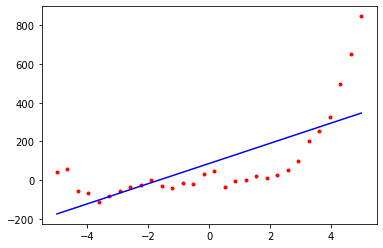

In [41]:
### YOUR SOLUTION HERE 
def linear_fit(X, Y, N):
    w1 = (np.dot(np.transpose(X), Y) - sum(X)/N*sum(Y)) / (np.dot(np.transpose(X), X) - (sum(X)/N)**2*N)
    w0 = sum(Y)/N - w1*sum(X)/N
    return w0[0,0], w1[0,0]

N = X.shape[0]
w0, w1 = linear_fit(X, Y, N)
plt.plot(X, Y, 'r.')
plt.plot([-5, 5], [linear_model(w0, w1, -5.), linear_model(w0, w1, 5.)], 'b-')
plt.show()

## Polynomial data [3 pt]

The linear model can easily be extended to polynomials of any order by expanding the original input with the squared input $x^2$, the cubed input $x^3$, etc and adding additional weights to the model. At the same time, we can prepare the structure we are using for the clever [array operations](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) and [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) named in the previous exercise. To make this easier, we will need to create a so-called $D$ matrix. This matrix contains the data for a $k^{th}$-order polynomial such that we can easily multiply it with the values for our weights $w_0$, $w_1$, $w_2$, etc..

If originally the dataset of $N$ elements is of the form $X$ (superscripts are indices here):

$$ X = \left[\begin{array}{c} x^1 \\ x^2 \\ \vdots \\ x^N \end{array} \right]$$

Then the matrix $D$ for a $k^{th}$-order polynomial becomes:

$$ D = \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]$$

For ease of calculation and implementation, the input is expanded with a vector of $1$'s, to represent the input for the constant parameter $w_0$. The parameters then become $w_0$, $w_1$, $w_2$, etc., one factor for each term of the polynomial.

Write a function `create_D_matrix` that constructs this matrix for a given vector $X$ up the specified order $k$. Looking at plots for the dataset we have been using so far, the relationship between the points will probably be at least be quadratic. Use the function to construct a matrix $D$ of order $2$, print the matrix and verify that it looks correct.

In [42]:
def create_D_matrix(X, k):
    D = np.ones(X.shape, dtype=float)
    for i in range(k):
        D = np.concatenate((D, np.power(X, i+1)), axis=1)
    return D

D = create_D_matrix(X, 2)
print(D)

[[ 1.         -5.         25.        ]
 [ 1.         -4.65517241 21.6706302 ]
 [ 1.         -4.31034483 18.57907253]
 [ 1.         -3.96551724 15.72532699]
 [ 1.         -3.62068966 13.10939358]
 [ 1.         -3.27586207 10.73127229]
 [ 1.         -2.93103448  8.59096314]
 [ 1.         -2.5862069   6.68846611]
 [ 1.         -2.24137931  5.02378121]
 [ 1.         -1.89655172  3.59690844]
 [ 1.         -1.55172414  2.4078478 ]
 [ 1.         -1.20689655  1.45659929]
 [ 1.         -0.86206897  0.7431629 ]
 [ 1.         -0.51724138  0.26753864]
 [ 1.         -0.17241379  0.02972652]
 [ 1.          0.17241379  0.02972652]
 [ 1.          0.51724138  0.26753864]
 [ 1.          0.86206897  0.7431629 ]
 [ 1.          1.20689655  1.45659929]
 [ 1.          1.55172414  2.4078478 ]
 [ 1.          1.89655172  3.59690844]
 [ 1.          2.24137931  5.02378121]
 [ 1.          2.5862069   6.68846611]
 [ 1.          2.93103448  8.59096314]
 [ 1.          3.27586207 10.73127229]
 [ 1.          3.62068966

## Polynomial model [1 pt]

Thus far, we have passed the weights for our polynomials through the use of the variables $w_0$ and $w_1$. To enable us to change the order of the polynomial we are fitting, we need to give our functions a set number of variables. Our solution will be to use a vector of weights $w$. The parameters can now be represented as:

$$ w = \left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right]$$

The hypothesis for a single input then just becomes:

$$ g(x^t) = \sum_{i=0}^k D^t_iw_i $$

Which can write as a matrix multiplication for all inputs in a single equation:

$$ \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]
\left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right] = \left[\begin{array}{c} g(x^1) \\ g(x^2) \\ \vdots \\ g(x^N) \end{array} \right]$$

You can do matrix multiplication using the [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function. Write the function `poly_model`, which should take a matrix $D$ and weight vector $W$ and compute the corresponding vector of hypotheses. 

In [57]:
def poly_model(D, W):
    return np.dot(D, W)

## Polynomial cost function and model fitting [3 pts]

For the cost function we can now use:

$$ E(w|X) = \frac{1}{2N} \sum_{t=1}^N [y^t - D^tw]^2$$

Here, we compute the hypothesis $g(x)$ for every example using $D^tw$, take the difference with the actual output $y^t$ and finally square and sum each difference. Note that this is extremely similar to the mean squared error function we used for the linear case.

Now we have the cost function equation and can again take the partial derivative for each of the weights $w_0$ to $w_k$ and set their value equal to $0$. Solving the resulting system of equations will give the set of weights that minimize the cost function. The weights describing this lowest point of the cost function are the parameters which will produce the line that best fits our dataset.

Solving all partial derivate equations for each weight can actually be done with just a couple of matrix operations. Deriving the equation yourself can be a bit involved, but know that the principle is exactly the same as for the linear model computing just $w_0$ and $w_1$. The final equation for weight vector becomes:

$$ w = (D^TD)^{-1}D^Ty $$

Numpy has built in functions for [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) and [inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html). Use them to write the code for the following functions.

* `poly_cost` should return the total cost $E$ given $w$, $D$ and $y$. We can use this to see how good a fit is.
* `poly_fit` should return the vector $w$ that bests fits the polynomial relationship between matrix $D$ and vector $y$

Using the quadratic matrix $D$ you constructed earlier and this `poly_fit` function, find the best fitting weights for a quadric polynomial on the data and print these weights

In [44]:
def poly_cost(W, D, Y):
    return np.sum(np.square(Y - poly_model(D, W))) / (2 * D.shape[0])

def poly_fit(D, Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(D), D)), np.transpose(D)), Y)

W = poly_fit(D, Y)
print(W)

[[-56.87348684]
 [ 52.14107002]
 [ 16.02439317]]


## Plotting polynomials [1 pt]

Now lets try and figure out what our fitted quadratic polynomial looks like. As the function is not linear, we will need more than just 2 points to actually plot the line. The easiest solution is to create a whole bunch of x-values as samples, compute the corresponding y-values and plot those. With enough samples the line will look smooth, even if it is connected with linear segments.

To create these x-values, we can use the function [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Then use the `create_D_matrix` and `poly_val` functions you wrote earlier and apply it to every x-value to compute the array of y-values. Now plot the original datapoints as dots and the hypothesis as a line, just as you've already done for the linear plot. 

Use these steps to fill in the `poly_plot` function below and show the polynomial function defined by the weights you found for the quadratic polynomial.

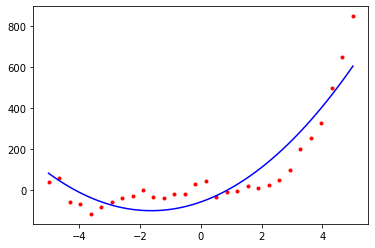

In [56]:
def poly_plot(W, X, Y):
    # Create 100 linearly spaced values between 5 and -5 and shape it as (100, 1)
    xvals = np.linspace((5,), (-5,), num=100)
    
    ### YOUR SOLUTION HERE
    D = create_D_matrix(xvals, W.shape[0] - 1)
    yvals = poly_model(D, W)

    plt.plot(X, Y, 'r.')
    plt.plot(xvals, yvals, 'b-')
    plt.show()

poly_plot(W, X, Y)

## Polynomial order [1 pt]

You can now create a polynomial fit on the data for a polynomial of any order. The next question then becomes: *What order polynomial fits the data best?*

Using the `create_D_matrix`, `poly_fit` and `poly_plot`, try to fit different order polynomials to the data. Show the plot for the order polynomial you think fits best.

Note that the cost function will most likely decrease with each added polynomial term, as there is more flexibility in the model to fit the data points exactly. However, these weights will fit those few data points very well, but might have very extreme values in between points that would not be good predictors for new inputs. Something like an order 20 polynomial might have a very well fitting shape for the existing data points, but looks like it would be strange predictor at some of the possible other points. Try to find a fit that looks visually like it would generalize well to new points.


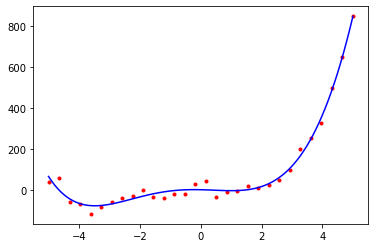

260.78836847978704


In [63]:
D = create_D_matrix(X, 5)
W = poly_fit(D, Y)
poly_plot(W, X, Y)
print(poly_cost(W, D, Y))

## Cross validation [2 pt]
As discussed in the last exercise, training the model on all of our data, and then taking the polynomial that has the lowest error will probably not give the model that generalises best; this model will overfit the training data, and perform really bad on most "new" data the model will get. Manually observing which model is best works great on our model now, but might become difficult when we get more data, or when the dimensionality of our data increases. Another way to see what order polynomial fits the data best *and* generalises to new data is to use cross validation. 

With cross validation you split the data into 2 parts and use one part to fit the model (training set) and the other part to see how well the model fits the remaining data (validation set). This way, we can *automatically* select a model that is less prone to overfitting. 

Write a function below to split the original dataset into 2 sets according to a given ratio. It is important to randomize your division, as simply using the first half of data for the one set and the second half for the other might result in a strange distribution. You could use a function like [permutation](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation) for this purpose.

Split the original dataset using a ratio of 0.6 into a training and a validation set. Then for both of these sets, use your old `split_X_Y` function to split them into their $X$ and $Y$ parts.

In [61]:
def validation_split(data, ratio):
    shuffled_data = np.random.permutation(data)
    sp = int(len(shuffled_data) * ratio)
    return shuffled_data[:sp], shuffled_data[sp:]

train, validate = validation_split(data, 0.6)
tr_x, tr_y = split_X_Y(train)
val_x, val_y = split_X_Y(validate)

## Model selection [5 pt]

With this new split of the data you can repeatedly fit different order polynomials to the training set and see which produces the lowest cost on the validation set. The set of weights with the lowests cost on the validation set generalizes the best to new data and is thus the best overal fit on the dataset. 

Write the function `best_poly_fit` below:
- Try a large range of polynomial orders (like 1 to 50), and for every of these polynomial orders:
  - Create the $D$ matrix based on the training set
  - Fit the weights 
  - Create the $D$ matrix based on the validation set
  - Using the weights, the validation $D$ matrix, and the validation output to compute the cost
- Return the set of weights with the lowest cost on the validation set and the corresponding cost.

Run this fitting function with your training and validation sets. Plot the hypothesis function and show the weights that were found and what the cost was. Note that rerunning your validation split code above will result in a different random distribution and thus a slightly different final fit.

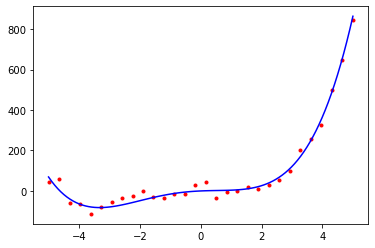

6
[[-1.24481665e+00  6.63343151e+00 -6.86889407e+00  3.02189101e+00
   1.02278462e+00 -4.04051340e-03]]


In [62]:
def best_poly_fit(train_x, train_y, val_x, val_y):
    bW = np.array([])
    bE = float('inf')
    
    for order in range(50):
        train_d = create_D_matrix(train_x, order)
        W = poly_fit(train_d, train_y)
        
        val_d = create_D_matrix(val_x, order)
        E = poly_cost(W, val_d, val_y)
        
        if E < bE:
            bW = W
            bE = E
    
    return bW, bE

W_best, E_best = best_poly_fit(tr_x, tr_y, val_x, val_y)
poly_plot(W_best, X, Y)
print(len(W_best))
print(np.transpose(W_best))